SC2001 Lab Project 1

In [1]:
class HybridSort:
    def __init__(self):
        self._comparisons = 0


    def get_comparisons(self):
        return self._comparisons


    def reset_comparisons(self):
        self._comparisons = 0


    def insertion_sort(self, arr, left, right):
        for i in range(left + 1, right + 1):
            key = arr[i]
            j = i - 1

            while j >= left and key < arr[j]:
                self._comparisons += 1
                arr[j + 1] = arr[j]
                j -= 1
            
            if j >= left:
                self._comparisons += 1         
            arr[j + 1] = key


    def _merge(self, arr, left, mid, right):
        left_half = arr[left : mid + 1]
        right_half = arr[mid + 1 : right + 1]

        i = 0 
        j = 0  
        k = left  

        while i < len(left_half) and j < len(right_half):
            self._comparisons += 1
            if left_half[i] <= right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1


    def sort(self, arr, S, left=None, right=None):
        if left is None:
            left = 0
        if right is None:
            right = len(arr) - 1
        
        self._hybrid_sort_recursive(arr, left, right, S)


    def _hybrid_sort_recursive(self, arr, left, right, S):
        if left < right:
            if (right - left + 1) <= S:
                self.insertion_sort(arr, left, right)
            else:
                mid = (left + right) // 2
                self._hybrid_sort_recursive(arr, left, mid, S)
                self._hybrid_sort_recursive(arr, mid + 1, right, S)
                self._merge(arr, left, mid, right)

In [2]:
class MergeSort:

    def __init__(self):
        self._comparisons = 0

    def get_comparisons(self):
        return self._comparisons

    def reset_comparisons(self):
        self._comparisons = 0

    def _merge(self, arr, left, mid, right):
        left_half = arr[left : mid + 1]
        right_half = arr[mid + 1 : right + 1]

        i = 0  
        j = 0  
        k = left  

        while i < len(left_half) and j < len(right_half):
            self._comparisons += 1
            if left_half[i] <= right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1
    
    def _merge_sort_recursive(self, arr, left, right):
        if left < right:
            mid = (left + right) // 2
            self._merge_sort_recursive(arr, left, mid)
            self._merge_sort_recursive(arr, mid + 1, right)
            self._merge(arr, left, mid, right)

    def sort(self, arr):
        self.reset_comparisons()
        self._merge_sort_recursive(arr, 0, len(arr) - 1)

In [3]:
import random
import sys

sys.setrecursionlimit(20000) 

def generate_datasets():
    sizes = []
    for i in range(10):
        sizes.append((i+1) * 1000)
        sizes.append((i+1) * 10000)
        sizes.append((i+1) * 100000)
        sizes.append((i+1) * 1000000)

# Remove duplicates and sort the input data sizes
    sizes = sorted(set(sizes))
    print(sizes)
    datasets = {}

    for n in sizes:
        datasets[n] = [random.randint(1, n) for _ in range(n)]
    return sizes, datasets

array_sizes, datasets = generate_datasets()
print("Length of datasets[1000]:", len(datasets[1000]))
print("First 10 elements:", datasets[1000][:10])
print("Last 10 elements:", datasets[1000][-10:])


[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000]
Length of datasets[1000]: 1000
First 10 elements: [741, 117, 285, 77, 113, 151, 802, 540, 557, 67]
Last 10 elements: [966, 403, 928, 42, 699, 629, 872, 990, 262, 527]


In [4]:
test_array = [38, 27, 43, 3, 9, 82, 10, 50, 15, 23, 54, 5, 23, 8]
print(f"Original Test Array: \n{test_array}\n")
print("-" * 40)

merge_sorter_test = MergeSort()
hybrid_sorter_test = HybridSort()

#test 1: original mergesort
print("Testing Original Mergesort")
mergesort_data = test_array.copy() 

merge_sorter_test.sort(mergesort_data)

print(f"Array after sorting: \n{mergesort_data}")
print(f"Comparisons made: {merge_sorter_test.get_comparisons()}")

is_sorted_merge = all(mergesort_data[i] <= mergesort_data[i+1] for i in range(len(mergesort_data)-1))
print(f"Verification -> Is sorted: {is_sorted_merge}\n")
print("-" * 40)


# test 2: hybrid sort
S_test = 4
print(f"Testing Hybrid Sort (with S = {S_test})")
hybrid_data = test_array.copy()

hybrid_sorter_test.sort(hybrid_data, S=S_test)

print(f"Array after sorting: \n{hybrid_data}")
print(f"Comparisons made: {hybrid_sorter_test.get_comparisons()}")

is_sorted_hybrid = all(hybrid_data[i] <= hybrid_data[i+1] for i in range(len(hybrid_data)-1))
print(f"Verification -> Is sorted: {is_sorted_hybrid}\n")
print("-" * 40)

Original Test Array: 
[38, 27, 43, 3, 9, 82, 10, 50, 15, 23, 54, 5, 23, 8]

----------------------------------------
Testing Original Mergesort
Array after sorting: 
[3, 5, 8, 9, 10, 15, 23, 23, 27, 38, 43, 50, 54, 82]
Comparisons made: 40
Verification -> Is sorted: True

----------------------------------------
Testing Hybrid Sort (with S = 4)
Array after sorting: 
[3, 5, 8, 9, 10, 15, 23, 23, 27, 38, 43, 50, 54, 82]
Comparisons made: 39
Verification -> Is sorted: True

----------------------------------------


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# task (c)-i: analyze performance with a fixed S 

hybrid_sorter = HybridSort()
S_fixed = 50
results_c1 = {}

print(f"Running Hybrid Sort with fixed threshold S = {S_fixed}")

for n in array_sizes:
    print(f"Testing for input size n = {n}: ")
    
    # always use a copy of the dataset for sorting
    # this ensures the original datasets[n] remains unsorted for other experiments
    data_to_sort = datasets[n].copy()
    
    hybrid_sorter.reset_comparisons()
    
    hybrid_sorter.sort(data_to_sort, S=S_fixed)
    
    num_comparisons = hybrid_sorter.get_comparisons()
    results_c1[n] = num_comparisons
    
    print(f"-> Completed. Key Comparisons: {num_comparisons}")

print("Results:", results_c1)

Running Hybrid Sort with fixed threshold S = 50
Testing for input size n = 1000: 
-> Completed. Key Comparisons: 13360
Testing for input size n = 2000: 
-> Completed. Key Comparisons: 28866
Testing for input size n = 3000: 
-> Completed. Key Comparisons: 55336
Testing for input size n = 4000: 
-> Completed. Key Comparisons: 61657
Testing for input size n = 5000: 
-> Completed. Key Comparisons: 86992
Testing for input size n = 6000: 
-> Completed. Key Comparisons: 116515
Testing for input size n = 7000: 
-> Completed. Key Comparisons: 107542
Testing for input size n = 8000: 
-> Completed. Key Comparisons: 130889
Testing for input size n = 9000: 
-> Completed. Key Comparisons: 156372
Testing for input size n = 10000: 
-> Completed. Key Comparisons: 183820
Testing for input size n = 20000: 
-> Completed. Key Comparisons: 387755
Testing for input size n = 30000: 
-> Completed. Key Comparisons: 535495
Testing for input size n = 40000: 
-> Completed. Key Comparisons: 812560
Testing for input

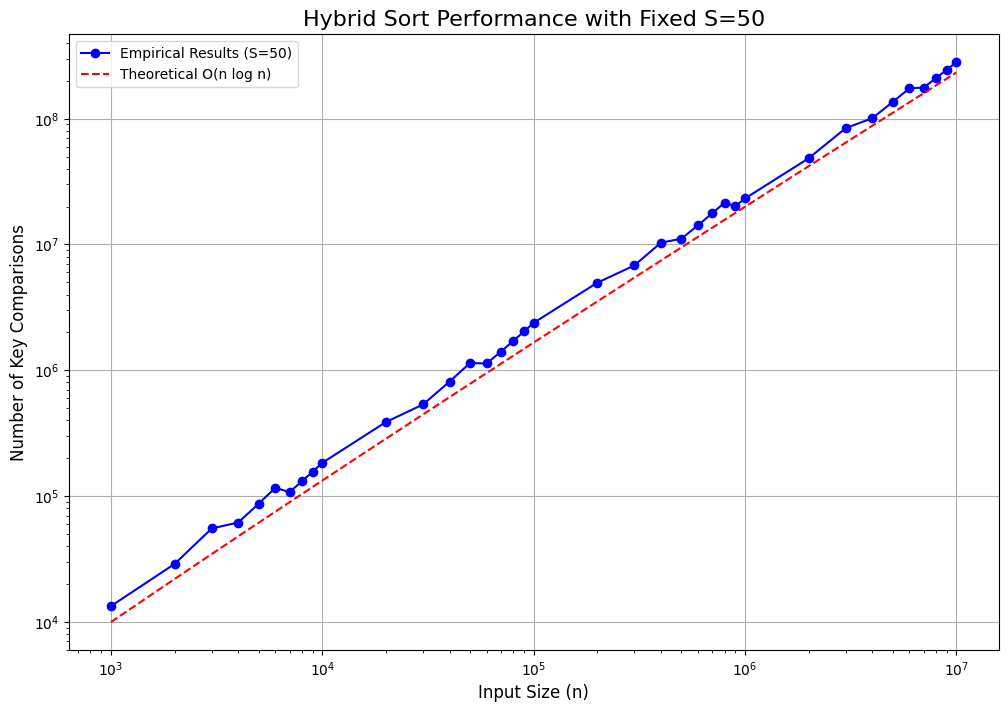

Analysis for Task (c)-i

[1] Confirmation of Time Complexity:
The log-log plot shows the empirical results (blue line) and the theoretical O(n log n) curve (red line) as nearly parallel straight lines.
This is strong evidence that the hybrid algorithm's time complexity is, as expected, dominated by Mergesort's O(n log n) behavior.

[2] Interpreting the Relationship Between the Curves:
The empirical curve is consistently above the baseline y = n*log₂(n) curve. This is because the actual number of comparisons is closer to c * n*log₂(n), where 'c' is a constant factor greater than 1, reflecting implementation overhead.
Furthermore, the vertical gap between the lines is not perfectly constant, particularly at smaller values of n. This is because the total work is a combination of Mergesort's O(n log n) operations and many Insertion Sort operations on small subarrays (of size S=50).
As n becomes very large, the O(n log n) work from the merge steps constitutes a larger and larger portion of 

In [6]:
n_values = sorted(results_c1.keys())
empirical_comparisons = [results_c1[n] for n in n_values]

# calculate the theoretical O(n log n) comparisons for reference
# the constant factor 'c' in 'c * n * log(n)' can be estimated from the data for a better fit
# c = empirical_comparisons[-1] / (n_values[-1] * np.log2(n_values[-1]))
# a simpler approach for visualization is to just plot n*log(n) and see the shape.
theoretical_comparisons = [n * np.log2(n) for n in n_values]

plt.figure(figsize=(12, 8))
plt.plot(n_values, empirical_comparisons, 'b-o', label='Empirical Results (S=50)')
plt.plot(n_values, theoretical_comparisons, 'r--', label='Theoretical O(n log n)')

plt.title('Hybrid Sort Performance with Fixed S=50', fontsize=16)
plt.xlabel('Input Size (n)', fontsize=12)
plt.ylabel('Number of Key Comparisons', fontsize=12)
plt.legend()
plt.grid(True)

#use a logarithmic scale for the x-axis for better visualization of large n
plt.xscale('log')
plt.yscale('log') #log scale on y-axis is also helpful to see if the lines are parallel

plt.show()

# theoretical analysis and comparison
print("Analysis for Task (c)-i")
print("\n[1] Confirmation of Time Complexity:")
print("The log-log plot shows the empirical results (blue line) and the theoretical O(n log n) curve (red line) as nearly parallel straight lines.")
print("This is strong evidence that the hybrid algorithm's time complexity is, as expected, dominated by Mergesort's O(n log n) behavior.")
print("\n[2] Interpreting the Relationship Between the Curves:")
print("The empirical curve is consistently above the baseline y = n*log₂(n) curve. This is because the actual number of comparisons is closer to c * n*log₂(n), where 'c' is a constant factor greater than 1, reflecting implementation overhead.")
print("Furthermore, the vertical gap between the lines is not perfectly constant, particularly at smaller values of n. This is because the total work is a combination of Mergesort's O(n log n) operations and many Insertion Sort operations on small subarrays (of size S=50).")
print("As n becomes very large, the O(n log n) work from the merge steps constitutes a larger and larger portion of the total runtime, causing the two curves to become more parallel.")
print("\n[3] Conclusion:")
print("The empirical results successfully validate the theoretical O(n log n) time complexity of the hybrid sorting algorithm for a fixed threshold S.")

In [7]:
# task (c)-ii: analyze performance with a fixed n and varying s

hybrid_sorter = HybridSort()

n_fixed = 1000000 
print(f"Running Hybrid Sort with fixed input size n = {n_fixed}")
print(f"Varying threshold S to find the optimal value.\n")

original_data = datasets[n_fixed]

s_values = list(range(2, 32, 2)) + list(range(32, 129, 8)) + list(range(128, 257, 16))

results_c2 = {}

for s in s_values:
    # IMPORTANT: use a fresh copy of the dataset for each run
    data_to_sort = original_data.copy()
    
    hybrid_sorter.reset_comparisons()
    
    hybrid_sorter.sort(data_to_sort, S=s)
    
    num_comparisons = hybrid_sorter.get_comparisons()
    
    results_c2[s] = num_comparisons
    
    print(f"S = {s:<5} -> Key Comparisons: {num_comparisons}")

# find the S that resulted in the minimum number of comparisons
optimal_s = min(results_c2, key=results_c2.get)
min_comparisons = results_c2[optimal_s]

print(f"\nOptimal S found: {optimal_s}")
print(f"Minimum comparisons: {min_comparisons}")

Running Hybrid Sort with fixed input size n = 1000000
Varying threshold S to find the optimal value.

S = 2     -> Key Comparisons: 18673768
S = 4     -> Key Comparisons: 18727861
S = 6     -> Key Comparisons: 18727861
S = 8     -> Key Comparisons: 19073256
S = 10    -> Key Comparisons: 19073256
S = 12    -> Key Comparisons: 19073256
S = 14    -> Key Comparisons: 19073256
S = 16    -> Key Comparisons: 20224584
S = 18    -> Key Comparisons: 20224584
S = 20    -> Key Comparisons: 20224584
S = 22    -> Key Comparisons: 20224584
S = 24    -> Key Comparisons: 20224584
S = 26    -> Key Comparisons: 20224584
S = 28    -> Key Comparisons: 20224584
S = 30    -> Key Comparisons: 21599629
S = 32    -> Key Comparisons: 23185954
S = 40    -> Key Comparisons: 23185954
S = 48    -> Key Comparisons: 23185954
S = 56    -> Key Comparisons: 23185954
S = 64    -> Key Comparisons: 29902639
S = 72    -> Key Comparisons: 29902639
S = 80    -> Key Comparisons: 29902639
S = 88    -> Key Comparisons: 29902639
S

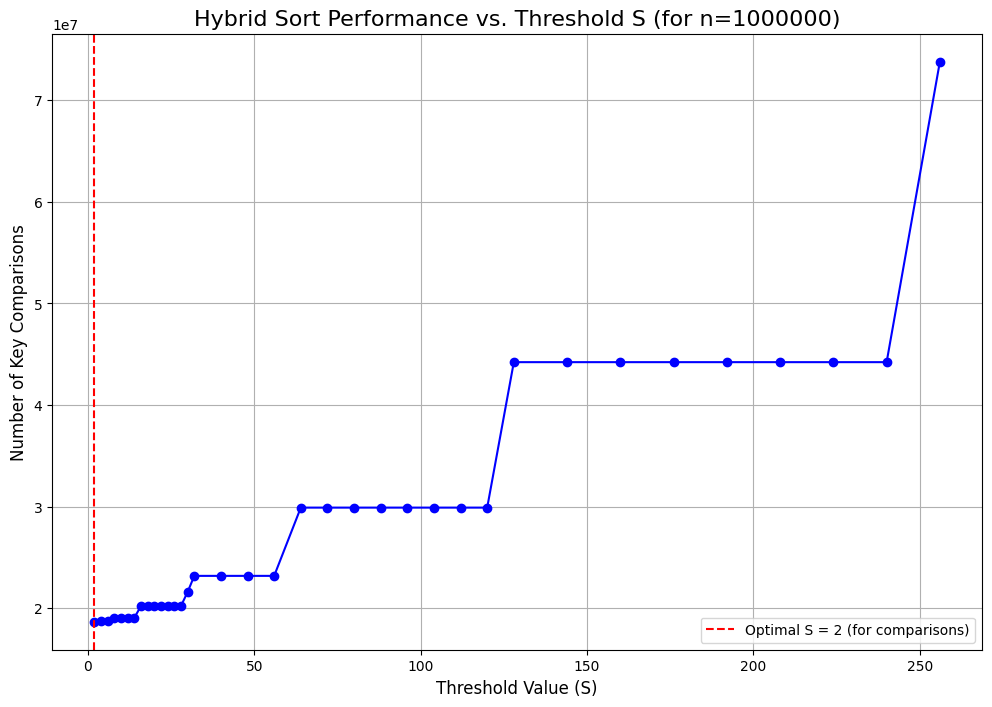

Analysis for Task (c)-ii
The plot shows that for a fixed input size n=1000000, the number of key comparisons generally increases as the threshold S increases.
This is because Mergesort is highly optimized to minimize comparisons. By increasing S, we replace more of the comparison-efficient Mergesort calls with Insertion Sort, which, while fast in terms of CPU time for small arrays, performs more comparisons on average (O(S^2)).
Based purely on minimizing key comparisons, the optimal value for S is very small (S=2).


In [8]:
# Task (c)-ii: plotting the results 

s_values_plot = sorted(results_c2.keys())
comparisons_vs_s = [results_c2[s] for s in s_values_plot]

plt.figure(figsize=(12, 8))
plt.plot(s_values_plot, comparisons_vs_s, 'b-o')

plt.title(f'Hybrid Sort Performance vs. Threshold S (for n={n_fixed})', fontsize=16)
plt.xlabel('Threshold Value (S)', fontsize=12)
plt.ylabel('Number of Key Comparisons', fontsize=12)
plt.grid(True)

# add a marker for the optimal S found
plt.axvline(x=optimal_s, color='r', linestyle='--', label=f'Optimal S = {optimal_s} (for comparisons)')
plt.legend()

plt.show()

# theoretical Analysis
print("Analysis for Task (c)-ii")
print(f"The plot shows that for a fixed input size n={n_fixed}, the number of key comparisons generally increases as the threshold S increases.")
print("This is because Mergesort is highly optimized to minimize comparisons. By increasing S, we replace more of the comparison-efficient Mergesort calls with Insertion Sort, which, while fast in terms of CPU time for small arrays, performs more comparisons on average (O(S^2)).")
print(f"Based purely on minimizing key comparisons, the optimal value for S is very small (S={optimal_s}).")


Input size n = 10000:
  Optimal S: 2 (Key Comparisons: 120485)

Input size n = 100000:
  Optimal S: 2 (Key Comparisons: 1536371)

Input size n = 1000000:
  Optimal S: 2 (Key Comparisons: 18673768)

Input size n = 10000000:
  Optimal S: 2 (Key Comparisons: 220101100)


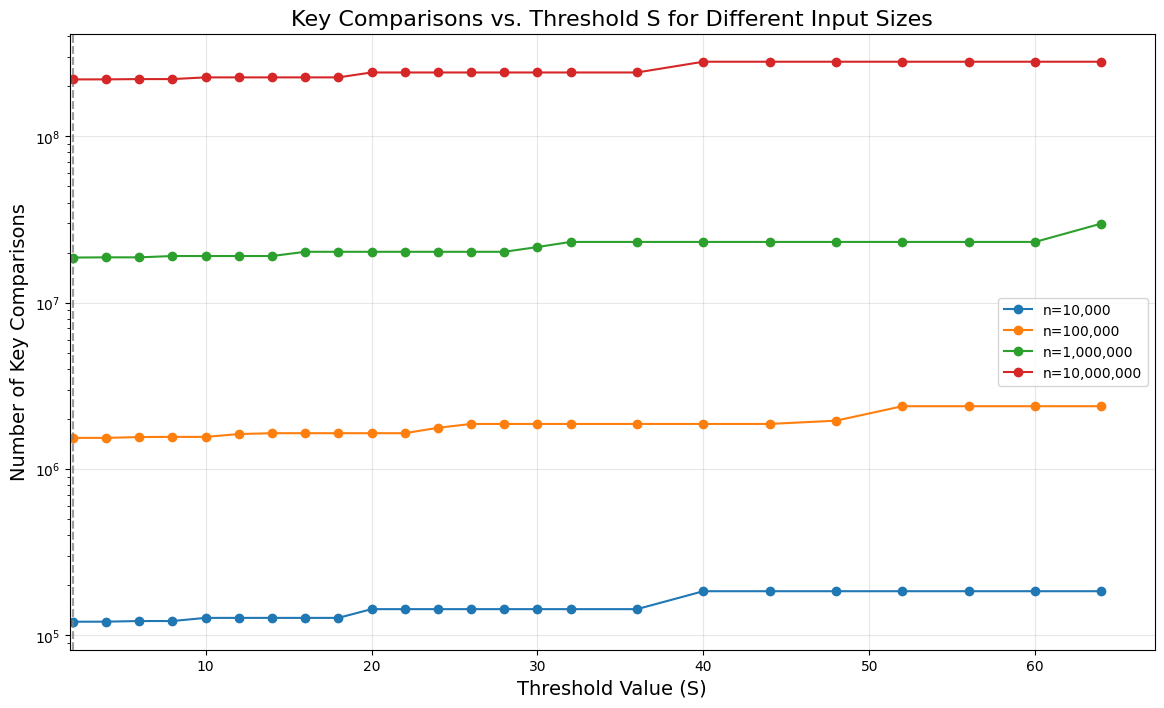


Summary of optimal S values for each input size:
n = 10,000: Optimal S = 2, Key Comparisons = 120485
n = 100,000: Optimal S = 2, Key Comparisons = 1536371
n = 1,000,000: Optimal S = 2, Key Comparisons = 18673768
n = 10,000,000: Optimal S = 2, Key Comparisons = 220101100


In [9]:
import matplotlib.pyplot as plt

hybrid_sorter = HybridSort()
# Using logarithmic sampling (10K, 100K, 1M, 10M) to reveal scaling patterns
# across multiple orders of magnitude while covering the full practical input range
input_sizes = [10000, 100000, 1000000, 10000000]
s_values = list(range(2, 33, 2)) + list(range(36, 65, 4))

optimal_S_results = {}

plt.figure(figsize=(14, 8))

for idx, n in enumerate(input_sizes):
    print(f"\nInput size n = {n}:")
    original_data = datasets[n]
    comparisons_results = {}

    for S in s_values:
        data_to_sort = original_data.copy()
        hybrid_sorter.reset_comparisons()
        hybrid_sorter.sort(data_to_sort, S=S)
        num_comparisons = hybrid_sorter.get_comparisons()
        comparisons_results[S] = num_comparisons

    optimal_S = min(comparisons_results, key=comparisons_results.get)
    min_comps = comparisons_results[optimal_S]
    optimal_S_results[n] = (optimal_S, min_comps)
    print(f"  Optimal S: {optimal_S} (Key Comparisons: {min_comps})")

    s_plot = sorted(comparisons_results.keys())
    comps_plot = [comparisons_results[s] for s in s_plot]
    plt.plot(s_plot, comps_plot, marker='o', label=f'n={n:,}')
    plt.axvline(x=optimal_S, color='gray', linestyle='--', alpha=0.3)

plt.title('Key Comparisons vs. Threshold S for Different Input Sizes', fontsize=16)
plt.xlabel('Threshold Value (S)', fontsize=14)
plt.ylabel('Number of Key Comparisons', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.yscale('log')
plt.xlim(min(s_values) * 0.9, max(s_values) * 1.05)
plt.show()

print("\nSummary of optimal S values for each input size:")
for n in input_sizes:
    S, comps = optimal_S_results[n]
    print(f"n = {n:,}: Optimal S = {S}, Key Comparisons = {comps}")


[Task (c)-iii] CPU-time sweep for multiple n

  n = 10,000:
    S = 2   -> CPU Time:  0.092 s
    S = 4   -> CPU Time:  0.012 s
    S = 6   -> CPU Time:  0.011 s
    S = 8   -> CPU Time:  0.011 s
    S = 10  -> CPU Time:  0.011 s
    S = 12  -> CPU Time:  0.012 s
    S = 14  -> CPU Time:  0.011 s
    S = 16  -> CPU Time:  0.011 s
    S = 18  -> CPU Time:  0.011 s
    S = 20  -> CPU Time:  0.011 s
    S = 22  -> CPU Time:  0.011 s
    S = 24  -> CPU Time:  0.011 s
    S = 26  -> CPU Time:  0.011 s
    S = 28  -> CPU Time:  0.011 s
    S = 30  -> CPU Time:  0.011 s
    S = 32  -> CPU Time:  0.011 s
    S = 36  -> CPU Time:  0.011 s
    S = 40  -> CPU Time:  0.013 s
    S = 44  -> CPU Time:  0.013 s
    S = 48  -> CPU Time:  0.013 s
    S = 52  -> CPU Time:  0.013 s
    S = 56  -> CPU Time:  0.013 s
    S = 60  -> CPU Time:  0.013 s
    S = 64  -> CPU Time:  0.013 s

  n = 100,000:
    S = 2   -> CPU Time:  0.159 s
    S = 4   -> CPU Time:  0.147 s
    S = 6   -> CPU Time:  0.139 s
    S

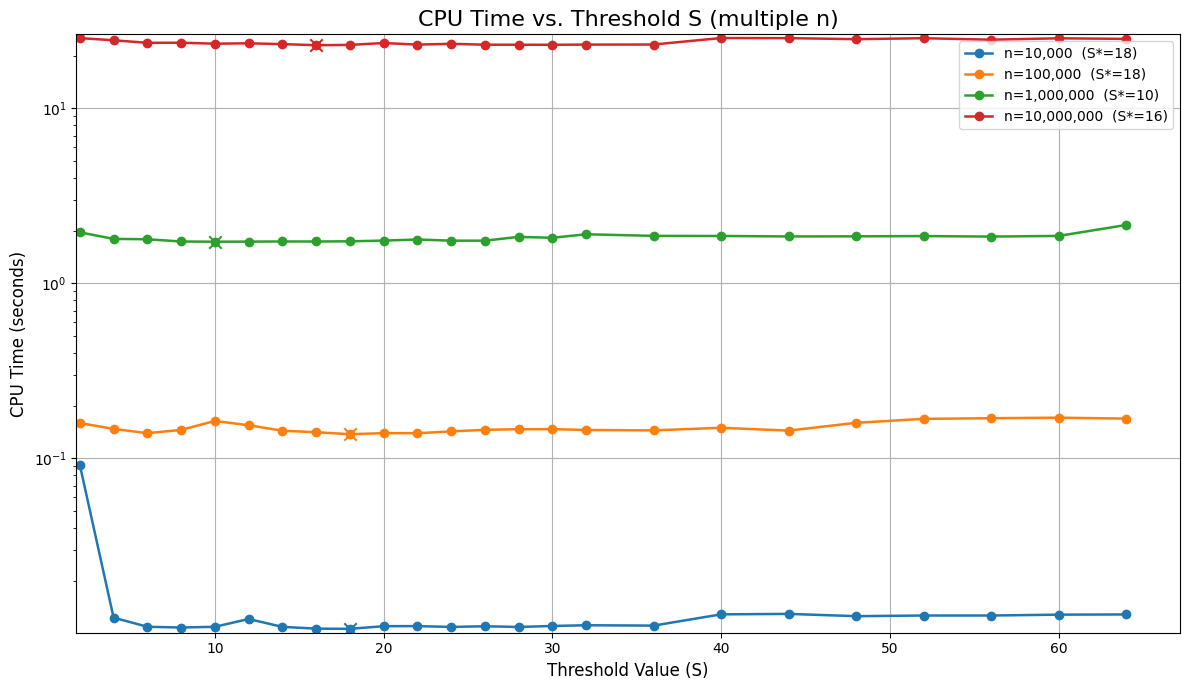

In [16]:
import time
import numpy as np
import matplotlib.pyplot as plt


S_GRID = list(range(2, 33, 2)) + list(range(36, 65, 4))
N_LIST = [10_000, 100_000, 1_000_000, 10_000_000]
REPEATS = 1  # set to 2–3 if you want smoother timings (will take longer)


hybrid_sorter = HybridSort()      # assumes your class is already defined

# ---------- timing sweep ----------
times_by_n = {}          # { n : { S : time_in_seconds } }
best_S_by_n = {}         # { n : S* }
min_time_by_n = {}       # { n : time_at_S* }

print("\n[Task (c)-iii] CPU-time sweep for multiple n")
for n in N_LIST:
    if n not in datasets:
        print(f"  [skip] n={n:,} not found in datasets")
        continue

    arr0 = datasets[n]
    timing_results = {}

    print(f"\n  n = {n:,}:")
    for S in S_GRID:
        # time the hybrid sort on a fresh copy (REPEATS times)
        t0 = time.perf_counter()
        for _ in range(REPEATS):
            a = arr0.copy()
            hybrid_sorter.reset_comparisons()   # comparisons not used here, but safe to reset
            hybrid_sorter.sort(a, S=S)
        t1 = time.perf_counter()
        avg_time = (t1 - t0) / REPEATS
        timing_results[S] = avg_time
        print(f"    S = {S:<3} -> CPU Time: {avg_time:6.3f} s")

    # store
    times_by_n[n] = timing_results
    # discrete argmin over the tested S
    best_S = min(timing_results, key=timing_results.get)
    best_S_by_n[n] = best_S
    min_time_by_n[n] = timing_results[best_S]

# ---------- summary table ----------
print("\nSummary (time-optimal S per n):")
print("n, S*, min_time_s")
for n in N_LIST:
    if n in best_S_by_n:
        print(f"{n:,}, {best_S_by_n[n]}, {min_time_by_n[n]:.3f}")

# ---------- combined plot ----------
plt.figure(figsize=(12, 7))
for n in N_LIST:
    if n not in times_by_n:
        continue
    s_vals = sorted(times_by_n[n].keys())
    t_vals = [times_by_n[n][s] for s in s_vals]
    S_star = best_S_by_n[n]
    T_star = times_by_n[n][S_star]

    # line + markers
    plt.plot(s_vals, t_vals, marker='o', linewidth=1.8, label=f"n={n:,}  (S*={S_star})")
    # highlight the best point for each n
    plt.scatter([S_star], [T_star], s=80, marker='x')

plt.title("CPU Time vs. Threshold S (multiple n)", fontsize=16)
plt.xlabel("Threshold Value (S)", fontsize=12)
plt.ylabel("CPU Time (seconds)", fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.yscale('log')
plt.xlim(min(S_GRID) * 0.9, max(S_GRID) * 1.05)

# y-limits based on all times collected
all_times = [t for per_n in times_by_n.values() for t in per_n.values()]
if all_times:
    plt.ylim(min(all_times) * 0.95, max(all_times) * 1.05)

plt.tight_layout()
plt.show()

Final Analysis on n = 10000000: 

[Task (c)-iii] Finding optimal S based on CPU time: 
S = 4     -> CPU Time: 24.8202 seconds
S = 8     -> CPU Time: 27.1955 seconds
S = 12    -> CPU Time: 23.9811 seconds
S = 16    -> CPU Time: 23.0847 seconds
S = 20    -> CPU Time: 23.6490 seconds
S = 24    -> CPU Time: 24.3530 seconds
S = 28    -> CPU Time: 24.4301 seconds
S = 32    -> CPU Time: 24.3508 seconds
S = 32    -> CPU Time: 24.3557 seconds
S = 48    -> CPU Time: 26.0793 seconds
S = 64    -> CPU Time: 26.0531 seconds
S = 80    -> CPU Time: 30.3381 seconds
S = 96    -> CPU Time: 30.4171 seconds
S = 112   -> CPU Time: 30.3268 seconds
S = 128   -> CPU Time: 30.5846 seconds

Optimal S for CPU Time found: 16 (with 23.0847 seconds)


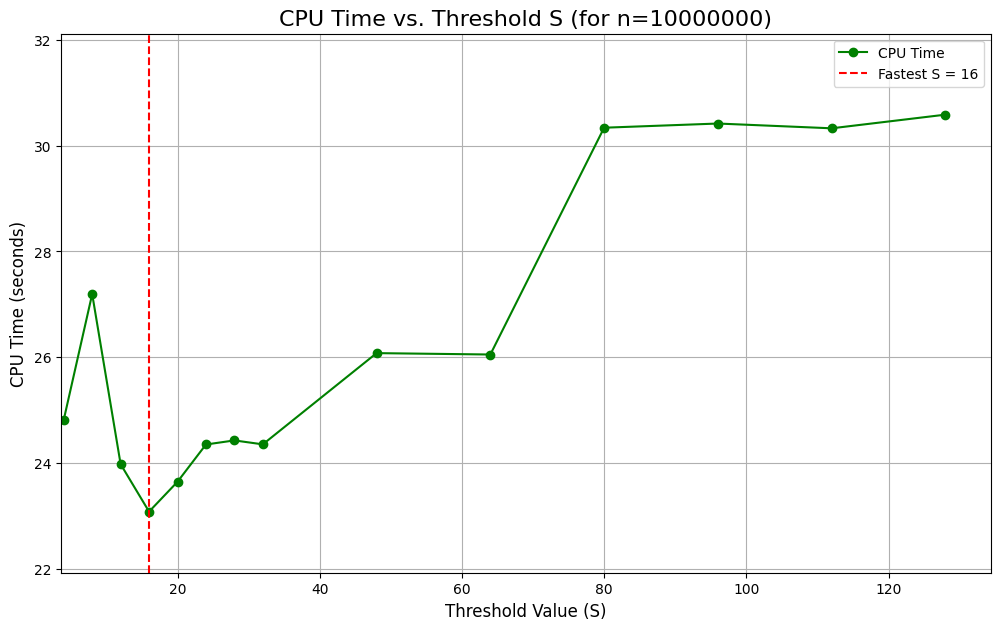

In [11]:
import time
import numpy as np

# task (d): data collection for visualizations 

# initialize sorters
hybrid_sorter = HybridSort()
merge_sorter = MergeSort()

# select the largest dataset
n_final = 10000000 
print(f"Final Analysis on n = {n_final}: ")
original_data = datasets[n_final]

# find Optimal S for CPU time
s_values_final = list(range(4, 33, 4)) + list(range(32, 129, 16))
timing_results = {}

print("\n[Task (c)-iii] Finding optimal S based on CPU time: ")
for s in s_values_final:
    data_to_sort = original_data.copy()
    
    start_time = time.time()
    hybrid_sorter.sort(data_to_sort, S=s)
    end_time = time.time()
    
    cpu_time = end_time - start_time
    timing_results[s] = cpu_time
    
    print(f"S = {s:<5} -> CPU Time: {cpu_time:.4f} seconds")

# determine the optimal S for speed
optimal_s_time = min(timing_results, key=timing_results.get)
min_time = timing_results[optimal_s_time]
print(f"\nOptimal S for CPU Time found: {optimal_s_time} (with {min_time:.4f} seconds)")



import matplotlib.pyplot as plt

# visualization for task (c)-iii  

#plot for finding the optimal S for CPU time
s_plot_vals = sorted(timing_results.keys())
time_plot_vals = [timing_results[s] for s in s_plot_vals]

plt.figure(figsize=(12, 7))
plt.plot(s_plot_vals, time_plot_vals, 'g-o', label='CPU Time') 
plt.title(f'CPU Time vs. Threshold S (for n={n_final})', fontsize=16)
plt.xlabel('Threshold Value (S)', fontsize=12)
plt.ylabel('CPU Time (seconds)', fontsize=12)
plt.axvline(x=optimal_s_time, color='r', linestyle='--', label=f'Fastest S = {optimal_s_time}')
plt.grid(True)

plt.xlim(min(s_plot_vals) * 0.9, max(s_plot_vals) * 1.05)
plt.ylim(min(time_plot_vals) * 0.95, max(time_plot_vals) * 1.05)

plt.legend()
plt.show()


In [12]:
# final benchmarks for comparison
S_optimal_for_time = optimal_s_time
S_optimal_for_comps = 2 #from task (c)-ii

print(f"\n[Task (d)] Running final benchmarks")

# original mergesort
data_merge = original_data.copy()
start_time = time.time()
merge_sorter.sort(data_merge)
time_merge = time.time() - start_time
comparisons_merge = merge_sorter.get_comparisons()
print("-> Original Mergesort -> Done.")

# hybrid sort with S optimal for time
data_hybrid_time = original_data.copy()
hybrid_sorter.reset_comparisons()
start_time = time.time()
hybrid_sorter.sort(data_hybrid_time, S=S_optimal_for_time)
time_hybrid_optimal_time = time.time() - start_time
comparisons_hybrid_optimal_time = hybrid_sorter.get_comparisons()
print(f"-> Hybrid Sort (S={S_optimal_for_time}) -> Done.")

# hybrid sort with S optimal for comparisons
data_hybrid_comps = original_data.copy()
hybrid_sorter.reset_comparisons()
start_time = time.time()
hybrid_sorter.sort(data_hybrid_comps, S=S_optimal_for_comps)
time_hybrid_optimal_comps = time.time() - start_time
comparisons_hybrid_optimal_comps = hybrid_sorter.get_comparisons()
print(f"-> Hybrid Sort (S={S_optimal_for_comps}) -> Done.")


[Task (d)] Running final benchmarks
-> Original Mergesort -> Done.
-> Hybrid Sort (S=16) -> Done.
-> Hybrid Sort (S=2) -> Done.


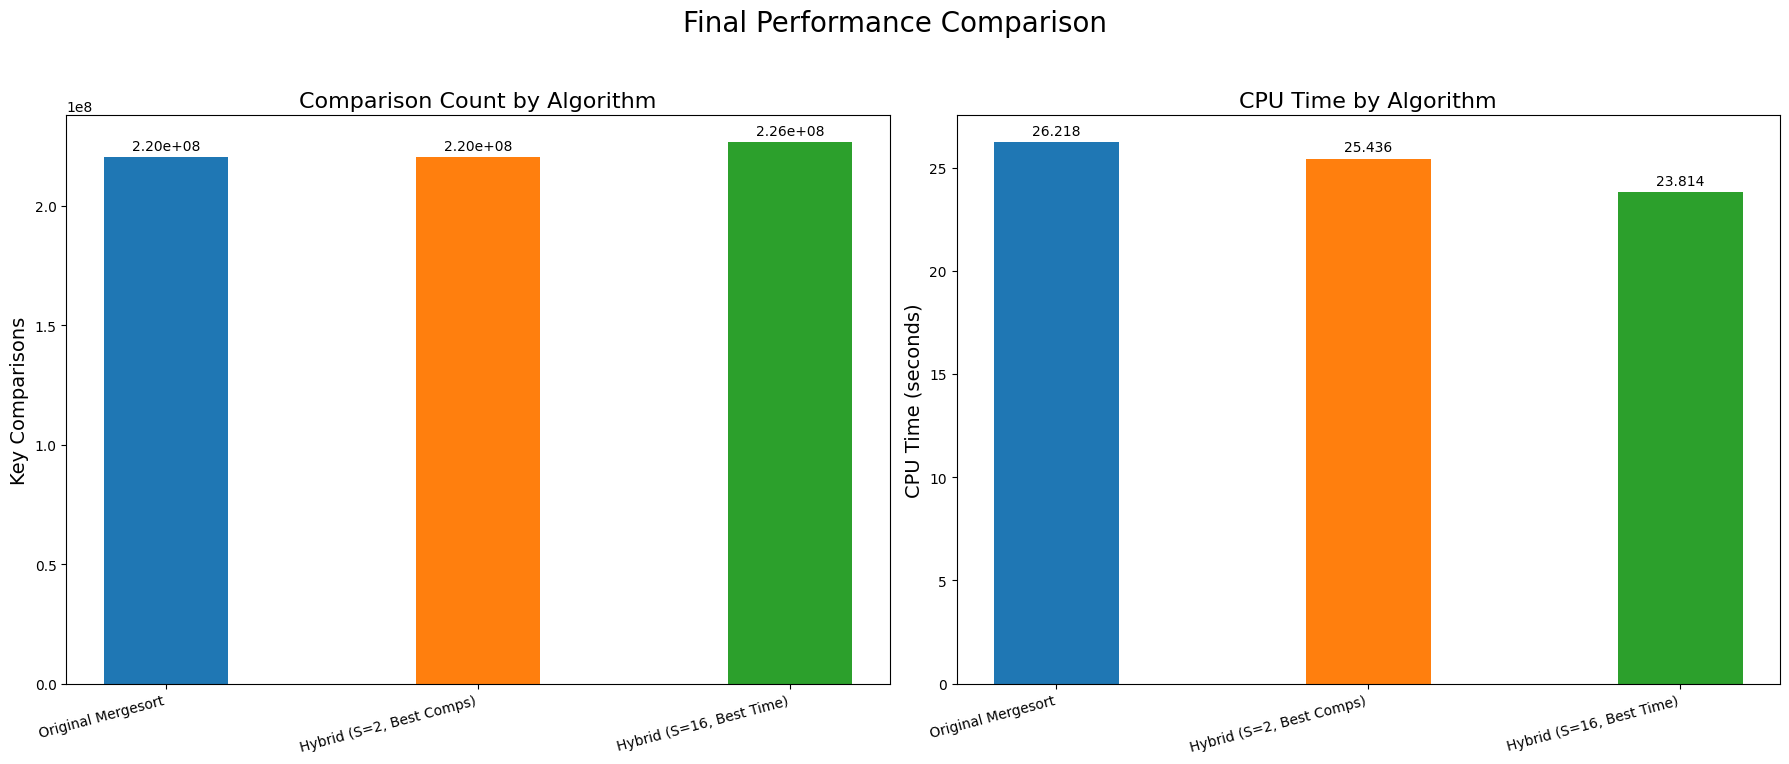

In [13]:
# final algo comparison plots

labels = ['Original Mergesort', f'Hybrid (S={S_optimal_for_comps}, Best Comps)', f'Hybrid (S={S_optimal_for_time}, Best Time)']
comparisons_data = [comparisons_merge, comparisons_hybrid_optimal_comps, comparisons_hybrid_optimal_time]
times_data = [time_merge, time_hybrid_optimal_comps, time_hybrid_optimal_time]

x = np.arange(len(labels))
width = 0.4

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Final Performance Comparison', fontsize=20)

# key comparisons bar chart
rects1 = ax1.bar(x, comparisons_data, width, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax1.set_ylabel('Key Comparisons', fontsize=14)
ax1.set_title('Comparison Count by Algorithm', fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=15, ha="right")
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.bar_label(rects1, padding=3, fmt='%.2e')

# cpu time bar chart
rects2 = ax2.bar(x, times_data, width, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax2.set_ylabel('CPU Time (seconds)', fontsize=14)
ax2.set_title('CPU Time by Algorithm', fontsize=16)
ax2.set_xticks(x)
ax2.set_xticklabels(labels, rotation=15, ha="right")
ax2.bar_label(rects2, padding=3, fmt='%.3f')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()